<div align="center">
  <h1>Mini Project</h1>
</div>


### - Project Description


The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

 The data has missing values as some stores do not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.

### - Loading Packages and Data


In [119]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

In [120]:
train_df = pd.read_csv("Train.csv")
test_df = pd.read_csv("Test.csv")

### - Data Structure and Content


In [121]:
train_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [122]:
train_df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [18]:
print(f"the shape of train dataframe is {train_df.shape} and the shape of the test dataframe is {test_df.shape}")

the shape of train dataframe is (8523, 12) and the shape of the test dataframe is (5681, 11)


In [21]:
train_df.info()
print("--------------------------------------------------")
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
---------------------------------------------

In [25]:
train_df.index

RangeIndex(start=0, stop=8523, step=1)

In [26]:
test_df.index

RangeIndex(start=0, stop=5681, step=1)

'Item_Identifier' :the identifier of each Item

'Item_Weight' :the weight of each Item

'Item_Fat_Content' : the pourcentage of fam in each Item

'Item_Visibility' : the visibility of each Item

'Item_Type': The type of the Item

'Item_MRP' : 


'Outlet_Identifier' : the identifier of the outlet 

'Outlet_Establishment_Year' : the year of the establishment 

'Outlet_Size' : the outlet size

'Outlet_Location_Type': the type of the outlets location

'Outlet_Type': the type of the outlet

'Item_Outlet_Sales' : the sales of an item in each outlet

In [15]:
train_df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [47]:
test_df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [28]:
train_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [32]:
train_df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [33]:
test_df.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [37]:
train_df.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [39]:
train_df["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [44]:
train_df["Outlet_Size"].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [45]:
train_df["Outlet_Location_Type"].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [46]:
train_df["Outlet_Type"].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

### - Exploratory Data Analysis (EDA)


/var/folders/_q/3y_gtfjs673fd2fhzm2k9y700000gn/T/ipykernel_2407/2594719155.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = train_df.corr()


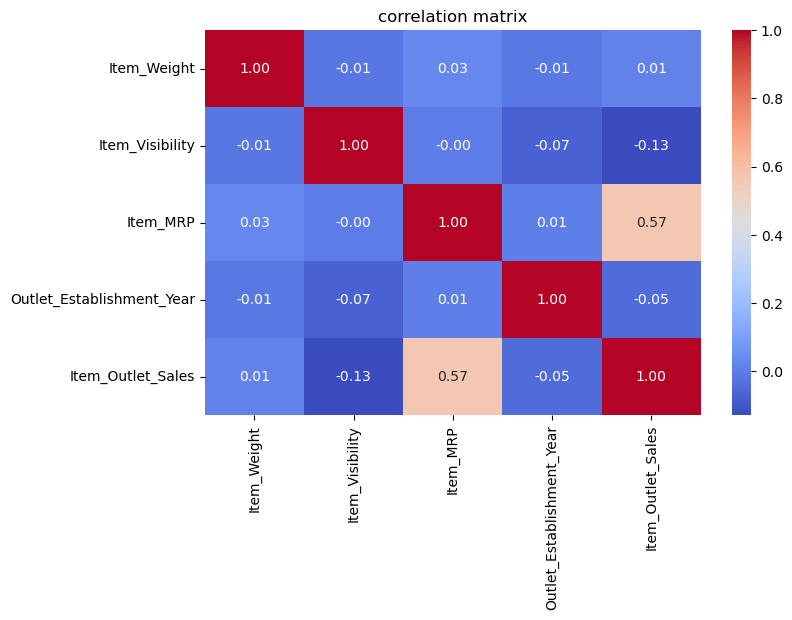

In [108]:
# correlation matrix
correlation_matrix = train_df.corr()

# visualization using heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('correlation matrix')
plt.show()


--> NUMERICAL VARIABLES :

Item_Weight, Item_Visibility, Item_MRP, Outlet_Establishment_Year, Item_Outlet_Sales

### Univariate analysis :



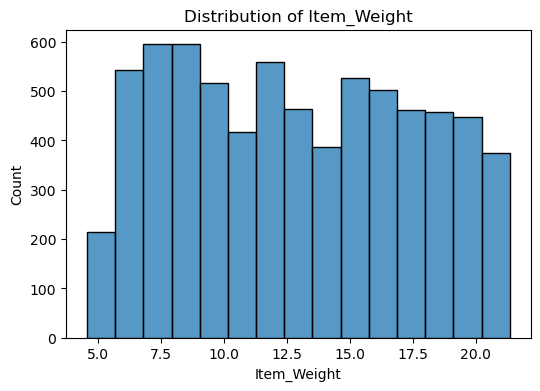

In [76]:
# Histogram of Item_Weight
plt.figure(figsize=(6, 4))
sns.histplot(train_df['Item_Weight'], bins=15)
plt.title('Distribution of Item_Weight')
plt.show()

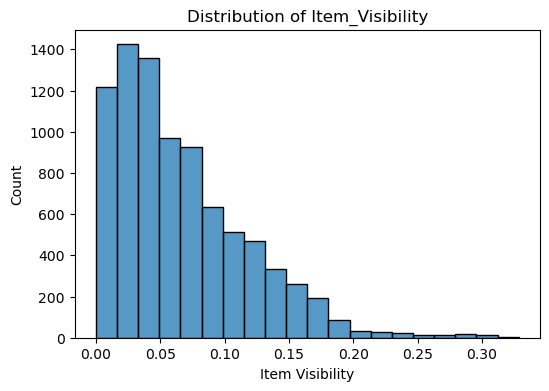

In [75]:
# Histogram of Item_Visibility
plt.figure(figsize=(6, 4))
sns.histplot(train_df['Item_Visibility'], bins=20)
plt.title('Distribution of Item_Visibility')
plt.xlabel('Item Visibility')
plt.show()

### Bivariate analysis :


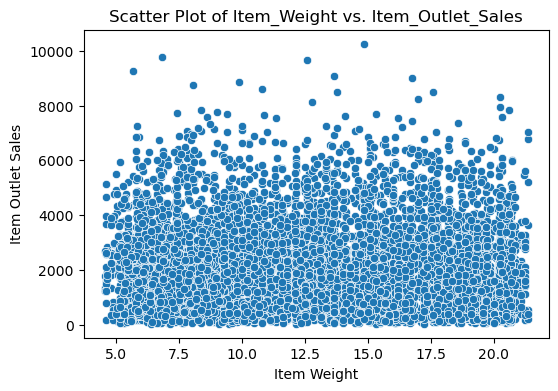

In [77]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Item_Weight', y='Item_Outlet_Sales', data=train_df)
plt.title('Scatter Plot of Item_Weight vs. Item_Outlet_Sales')
plt.xlabel('Item Weight')
plt.ylabel('Item Outlet Sales')
plt.show()

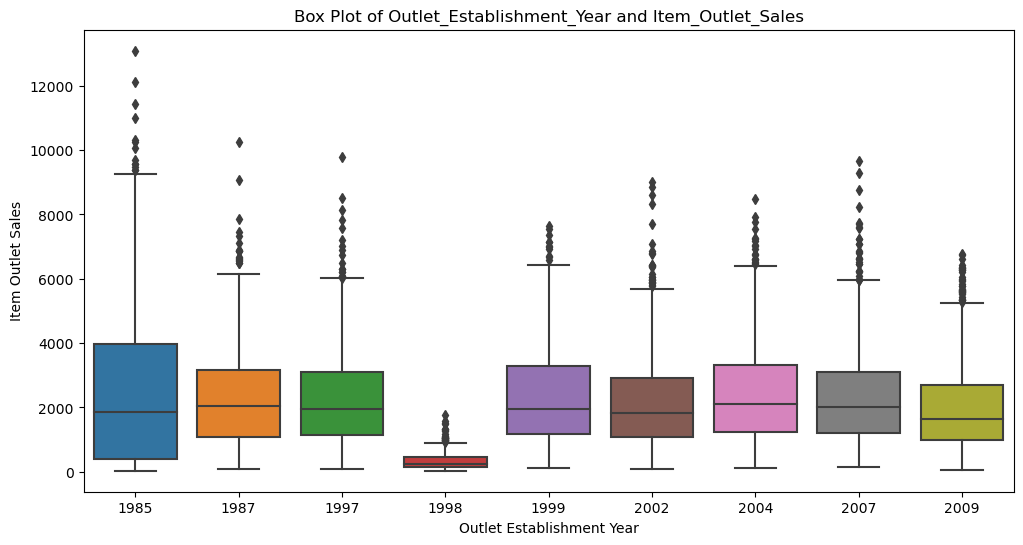

In [65]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Outlet_Establishment_Year', y='Item_Outlet_Sales', data=train_df)
plt.title('Box Plot of Outlet_Establishment_Year and Item_Outlet_Sales')
plt.xlabel('Outlet Establishment Year')
plt.ylabel('Item Outlet Sales')
plt.show()

--> CATEGORICAL VARIABLES :

Item_Fat_Content, Item_Type, Outlet_Size, Outlet_Location_Type, Outlet_Type 


### Univariate analysis :


In [104]:
train_df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

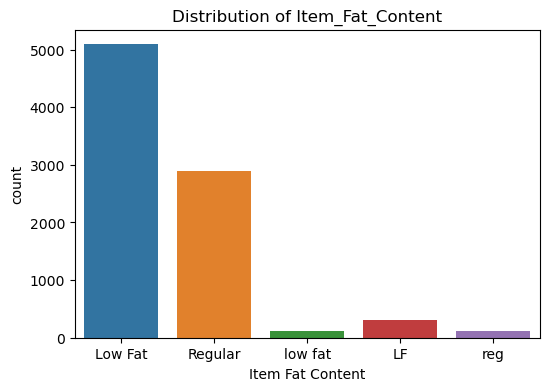

In [69]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Item_Fat_Content', data=train_df)
plt.title('Distribution of Item_Fat_Content')
plt.xlabel('Item Fat Content')
plt.show()

In [105]:
train_df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

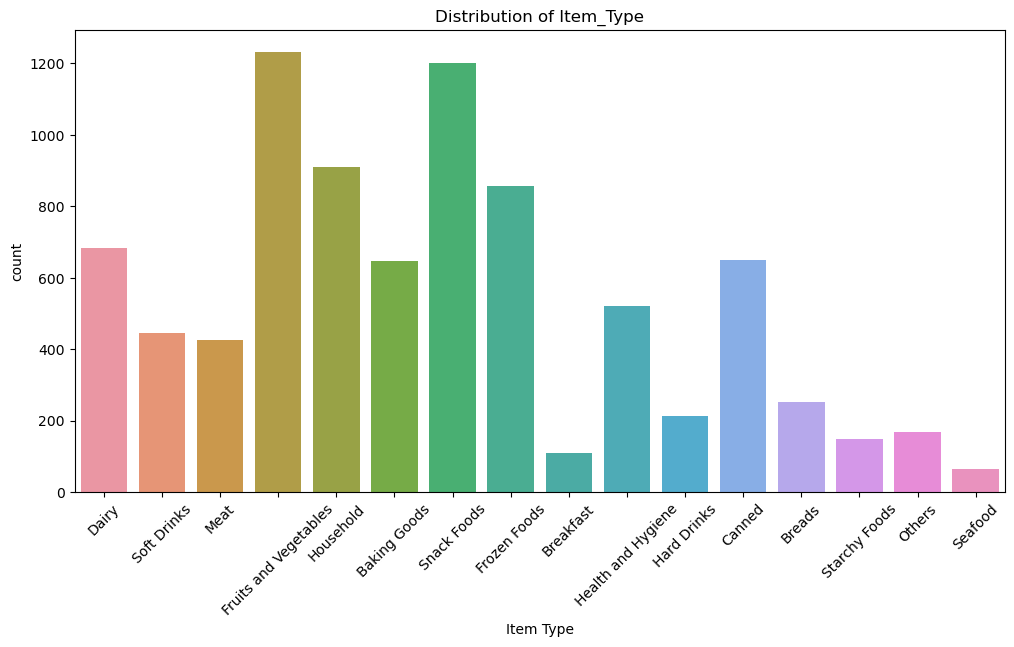

In [71]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Item_Type', data=train_df)
plt.title('Distribution of Item_Type')
plt.xlabel('Item Type')
plt.xticks(rotation=45)
plt.show()

In [106]:
train_df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

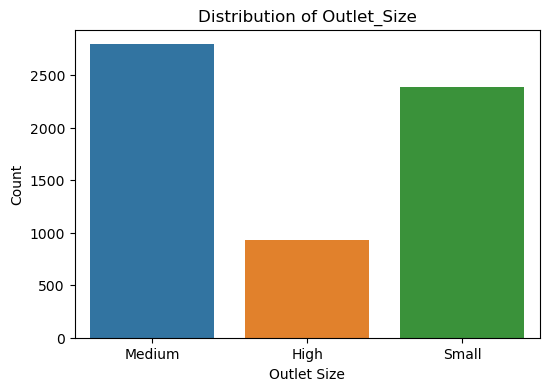

In [74]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Outlet_Size', data=train_df)
plt.title('Distribution of Outlet_Size')
plt.xlabel('Outlet Size')
plt.ylabel('Count')
plt.show()

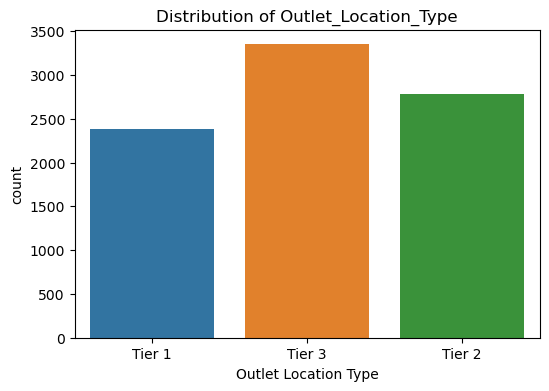

In [81]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Outlet_Location_Type', data=train_df)
plt.title('Distribution of Outlet_Location_Type')
plt.xlabel('Outlet Location Type')
plt.show()

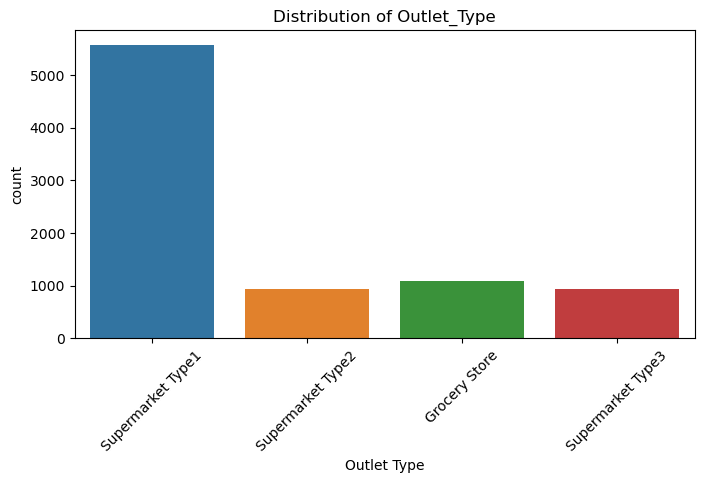

In [95]:
plt.figure(figsize=(8, 4))
sns.countplot(x='Outlet_Type', data=train_df)
plt.title('Distribution of Outlet_Type')
plt.xlabel('Outlet Type')
plt.xticks(rotation=45)
plt.show()

### Bivariate analysis :


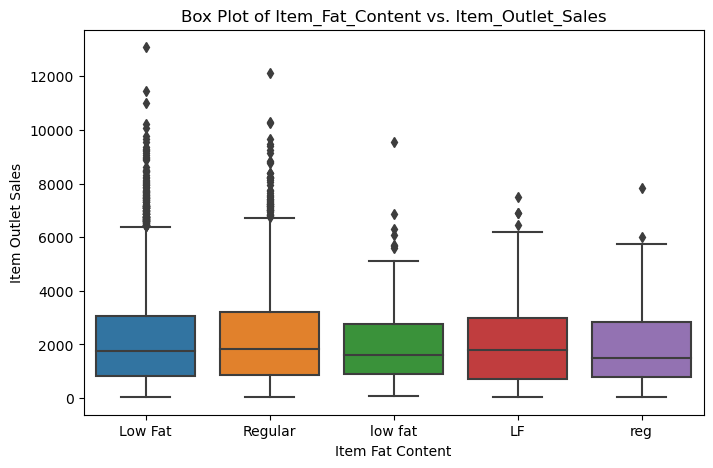

In [88]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Item_Fat_Content', y='Item_Outlet_Sales', data=train_df)
plt.title('Box Plot of Item_Fat_Content vs. Item_Outlet_Sales')
plt.xlabel('Item Fat Content')
plt.ylabel('Item Outlet Sales')
plt.show()

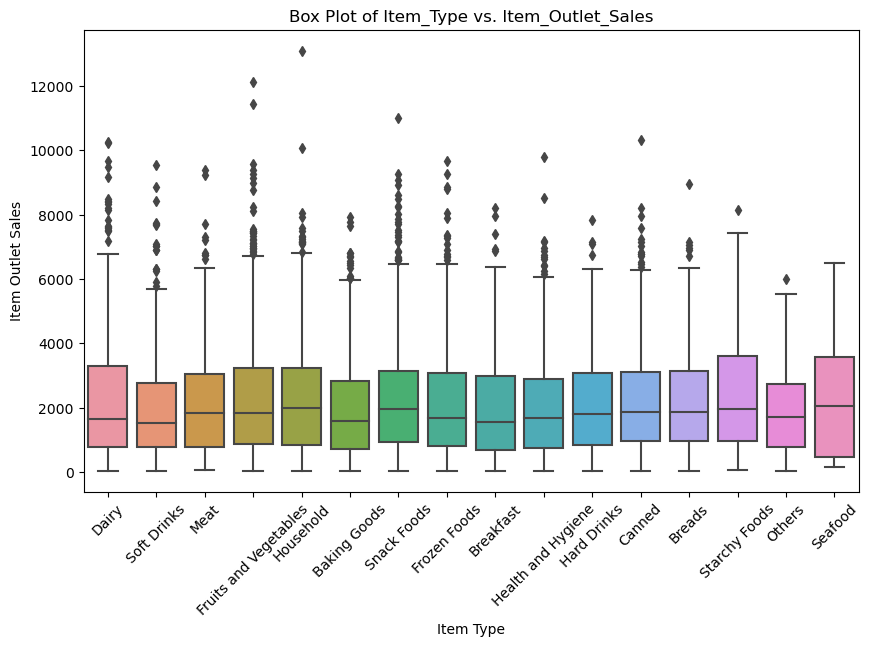

In [111]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Item_Type', y='Item_Outlet_Sales', data=train_df)
plt.title('Box Plot of Item_Type vs. Item_Outlet_Sales')
plt.xlabel('Item Type')
plt.ylabel('Item Outlet Sales')
plt.xticks(rotation=45)
plt.show()


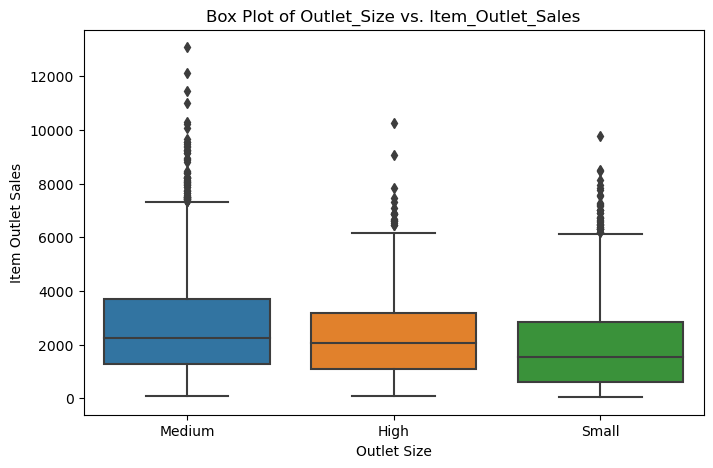

In [96]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Outlet_Size', y='Item_Outlet_Sales', data=train_df)
plt.title('Box Plot of Outlet_Size vs. Item_Outlet_Sales')
plt.xlabel('Outlet Size')
plt.ylabel('Item Outlet Sales')
plt.show()

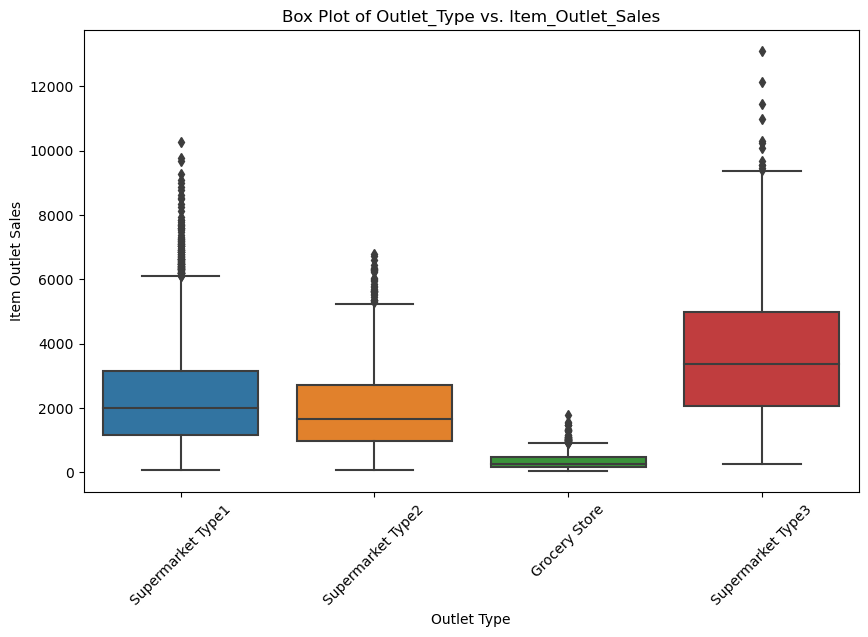

In [102]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=train_df)
plt.title('Box Plot of Outlet_Type vs. Item_Outlet_Sales')
plt.xlabel('Outlet Type')
plt.ylabel('Item Outlet Sales')
plt.xticks(rotation=45)
plt.show()

### Missing Value Treatment :

As we can see, we have 2 columns that have missing values, Item_Weight and the solution is that we are going to make an imputation. Since the variable in the first one is numerical we can impute the missing values with the mean ..and in the second one with the mode. we just need to know the pourcentage of the missing values in each column before doing so.

In [123]:
train_df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [125]:
train_df.isnull().sum()/train_df.shape[0] *100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [124]:
test_df.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [126]:
test_df.isnull().sum()/test_df.shape[0] *100

Item_Identifier               0.000000
Item_Weight                  17.180074
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.269671
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
dtype: float64

In [127]:
train_df['Item_Weight'].fillna(train_df['Item_Weight'].mean(), inplace=True)

In [128]:
test_df['Item_Weight'].fillna(test_df['Item_Weight'].mean(), inplace=True)

In [129]:
train_df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

And we have also the second column which is Outlet_Siza have 2410 missing values and since it contains categorical values we can use the mode 

In [130]:
#train
train_df['Outlet_Size'] = train_df['Outlet_Size'].fillna(train_df['Outlet_Size'].mode().values[0])

#test
test_df['Outlet_Size'] = test_df['Outlet_Size'].fillna(test_df['Outlet_Size'].mode().values[0])

In [131]:
train_df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

### Feature engineering :

In [149]:
train_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,24
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,14
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,24
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,Medium,Tier 3,Grocery Store,732.3800,25
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,36


we can drop the outlet_establishment_year and create a new column containg the age of the outlet.

In [148]:
current_year = 2023
train_df['Outlet_Age'] = current_year - train_df['Outlet_Establishment_Year']
train_df.drop('Outlet_Establishment_Year', axis=1, inplace=True)

In [150]:
current_year = 2023
test_df['Outlet_Age'] = current_year - test_df['Outlet_Establishment_Year']
test_df.drop('Outlet_Establishment_Year', axis=1, inplace=True)

In [166]:
train_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,24
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,14
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,24
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,Medium,Tier 3,Grocery Store,732.3800,25
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,36


In [ ]:
Item_Fat_Content
Outlet_Size
Outlet_Location_Type

### Encoding Categorical Variables :

But before doing so, we have to edit a column which is the Item_Fat_Content column

In [135]:
train_df['Item_Fat_Content'].unique()

array(['Low Fat', 'reg', 'Regular', 'LF', 'low fat'], dtype=object)

In [139]:
train_df['Item_Fat_Content'].replace(['LF', 'low fat', 'reg'], 
                                  ['Low Fat','Low Fat','Regular'],inplace = True)

In [136]:
test_df['Item_Fat_Content'].replace(['LF', 'low fat', 'reg'], 
                                  ['Low Fat','Low Fat','Regular'],inplace = True)

In [140]:
train_df['Item_Fat_Content'].nunique()

2

In [145]:
train_df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

### Label Encoding

In [173]:
train_df['Item_Fat_Content'] = train_df['Item_Fat_Content'].map({'Low Fat': 0, 'Regular': 1})

In [176]:
test_df['Item_Fat_Content'] = test_df['Item_Fat_Content'].map({'Low Fat': 0, 'Regular': 1})

In [177]:
test_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Age
0,FDW58,20.750000,0,0.007565,Snack Foods,107.8622,OUT049,Medium,Tier 1,Supermarket Type1,24
1,FDW14,8.300000,1,0.038428,Dairy,87.3198,OUT017,Medium,Tier 2,Supermarket Type1,16
2,NCN55,14.600000,0,0.099575,Others,241.7538,OUT010,Medium,Tier 3,Grocery Store,25
3,FDQ58,7.315000,0,0.015388,Snack Foods,155.0340,OUT017,Medium,Tier 2,Supermarket Type1,16
4,FDY38,12.695633,1,0.118599,Dairy,234.2300,OUT027,Medium,Tier 3,Supermarket Type3,38


In [164]:
train_df['Outlet_Size'].nunique()

3

In [175]:
train_df['Outlet_Size'].unique()

array(['Medium', 'High', 'Small'], dtype=object)

In [178]:
train_df['Outlet_Size'] = train_df['Outlet_Size'].map({'Small': 0, 'Medium': 1, 'High': 2})

In [179]:
test_df['Outlet_Size'] = test_df['Outlet_Size'].map({'Small': 0, 'Medium': 1, 'High': 2})

In [180]:
test_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Age
0,FDW58,20.750000,0,0.007565,Snack Foods,107.8622,OUT049,1,Tier 1,Supermarket Type1,24
1,FDW14,8.300000,1,0.038428,Dairy,87.3198,OUT017,1,Tier 2,Supermarket Type1,16
2,NCN55,14.600000,0,0.099575,Others,241.7538,OUT010,1,Tier 3,Grocery Store,25
3,FDQ58,7.315000,0,0.015388,Snack Foods,155.0340,OUT017,1,Tier 2,Supermarket Type1,16
4,FDY38,12.695633,1,0.118599,Dairy,234.2300,OUT027,1,Tier 3,Supermarket Type3,38


In [182]:
train_df['Outlet_Location_Type'].nunique()

3

In [185]:
train_df['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [186]:
test_df['Outlet_Location_Type'] = test_df['Outlet_Location_Type'].map({'Tier 1': 0, 'Tier 2': 1, 'Tier 3': 2})

In [188]:
train_df['Outlet_Location_Type'] = train_df['Outlet_Location_Type'].map({'Tier 1': 0, 'Tier 2': 1, 'Tier 3': 2})

### One Hot Encoding

In [162]:
train_df['Item_Type'].nunique()

16

In [190]:
item_type_onehot = pd.get_dummies(train_df['Item_Type'], prefix='Item_Type')

# Concatenate the one-hot encoded columns with the original DataFrame
train_df = pd.concat([train_df, item_type_onehot], axis=1)

# Drop the original 'Item_Type' column
train_df.drop('Item_Type', axis=1, inplace=True)

In [192]:
item_type_onehot = pd.get_dummies(test_df['Item_Type'], prefix='Item_Type')
test_df = pd.concat([test_df, item_type_onehot], axis=1)
test_df.drop('Item_Type', axis=1, inplace=True)

In [168]:
train_df['Outlet_Type'].nunique()

4

In [193]:
outlet_type_onehot = pd.get_dummies(train_df['Outlet_Type'], prefix='Outlet_Type')

# Concatenate the one-hot encoded columns with the original DataFrame
train_df = pd.concat([train_df, outlet_type_onehot], axis=1)

# Drop the original 'Outlet_Type' column
train_df.drop('Outlet_Type', axis=1, inplace=True)

In [194]:
train_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Outlet_Age,...,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,FDA15,9.30,0,0.016047,249.8092,OUT049,1,0,3735.1380,24,...,0,0,0,0,0,0,0,1,0,0
1,DRC01,5.92,1,0.019278,48.2692,OUT018,1,2,443.4228,14,...,0,0,0,0,1,0,0,0,1,0
2,FDN15,17.50,0,0.016760,141.6180,OUT049,1,0,2097.2700,24,...,1,0,0,0,0,0,0,1,0,0
3,FDX07,19.20,1,0.000000,182.0950,OUT010,1,2,732.3800,25,...,0,0,0,0,0,0,1,0,0,0
4,NCD19,8.93,0,0.000000,53.8614,OUT013,2,2,994.7052,36,...,0,0,0,0,0,0,0,1,0,0


In [195]:
outlet_type_onehot = pd.get_dummies(test_df['Outlet_Type'], prefix='Outlet_Type')
test_df = pd.concat([test_df, outlet_type_onehot], axis=1)
test_df.drop('Outlet_Type', axis=1, inplace=True)

### PreProcessing Data

In [198]:
train_df['Item_Weight'] = train_df['Item_Weight'].round(2)

In [199]:
test_df['Item_Weight'] = test_df['Item_Weight'].round(2)

In [201]:
train_df.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1, inplace=True)

In [202]:
test_df.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1, inplace=True)

### Modeling

In [204]:
train_df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Outlet_Age,Item_Type_Baking Goods,Item_Type_Breads,...,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0,0.016047,249.8092,1,0,3735.1380,24,0,0,...,0,0,0,0,0,0,0,1,0,0
1,5.92,1,0.019278,48.2692,1,2,443.4228,14,0,0,...,0,0,0,0,1,0,0,0,1,0
2,17.50,0,0.016760,141.6180,1,0,2097.2700,24,0,0,...,1,0,0,0,0,0,0,1,0,0
3,19.20,1,0.000000,182.0950,1,2,732.3800,25,0,0,...,0,0,0,0,0,0,1,0,0,0
4,8.93,0,0.000000,53.8614,2,2,994.7052,36,0,0,...,0,0,0,0,0,0,0,1,0,0


### Linear Regression

In [206]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_train = train_df['Item_Outlet_Sales']
X_train = train_df.drop('Item_Outlet_Sales', axis=1) 

X_test = test_df 

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Train the model on the training set
model.fit(X_train, y_train)

# Predict on the validation set
y_val_pred = model.predict(X_val)

# Evaluate the model
mse = mean_squared_error(y_val, y_val_pred)
mae = mean_absolute_error(y_val, y_val_pred)
r2 = r2_score(y_val, y_val_pred)

# Print the evaluation metrics
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2): {r2}')


Mean Squared Error (MSE): 1146693.541197741
Mean Absolute Error (MAE): 792.8015830301639
R-squared (R2): 0.5781066335932377


In [208]:
# Predict on the test set
y_test_pred = model.predict(X_test)

# Create a new column in test_df with the predicted values
test_df['Item_Outlet_Sales_Predicted'] = y_test_pred

# Save the predictions and test_df to a CSV file
test_df.to_csv('predicted_values.csv', index=False)

### Regularized Linear Regression

In [213]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd


# Initialize the Ridge regression model
alpha = 1.0  # Regularization strength (adjust as needed)
model = Ridge(alpha=alpha)

# Train the model on the training set
model.fit(X_train, y_train)

# Predict on the validation set
y_val_pred = model.predict(X_val)

# Evaluate the model
mse = mean_squared_error(y_val, y_val_pred)
mae = mean_absolute_error(y_val, y_val_pred)
r2 = r2_score(y_val, y_val_pred)

# Print the evaluation metrics
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2): {r2}')

Mean Squared Error (MSE): 1146618.4831633936
Mean Absolute Error (MAE): 792.715348152519
R-squared (R2): 0.578134249068209


### RandomForest

In [215]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd


# Initialize the Random Forest Regressor
n_estimators = 100  # Number of trees in the forest (adjust as needed)
model = RandomForestRegressor(n_estimators=n_estimators, random_state=42)

# Train the model on the training set
model.fit(X_train, y_train)

# Predict on the validation set
y_val_pred = model.predict(X_val)

# Evaluate the model
mse = mean_squared_error(y_val, y_val_pred)
mae = mean_absolute_error(y_val, y_val_pred)
r2 = r2_score(y_val, y_val_pred)

# Print the evaluation metrics
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2): {r2}')


Mean Squared Error (MSE): 1200737.5097431429
Mean Absolute Error (MAE): 764.9391429442815
R-squared (R2): 0.5582226881410073


### XGBoost

In [218]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd

# Initialize the XGBoost Regressor
n_estimators = 100  # Number of boosting rounds (adjust as needed)
learning_rate = 0.1  # Step size shrinkage to prevent overfitting (adjust as needed)
model = XGBRegressor(n_estimators=n_estimators, learning_rate=learning_rate, random_state=42)

# Train the model on the training set
model.fit(X_train, y_train)

# Predict on the validation set
y_val_pred = model.predict(X_val)

# Evaluate the model
mse = mean_squared_error(y_val, y_val_pred)
mae = mean_absolute_error(y_val, y_val_pred)
r2 = r2_score(y_val, y_val_pred)

# Print the evaluation metrics
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2): {r2}')



Mean Squared Error (MSE): 1131953.8252122474
Mean Absolute Error (MAE): 735.3546888522075
R-squared (R2): 0.5835296940479988
